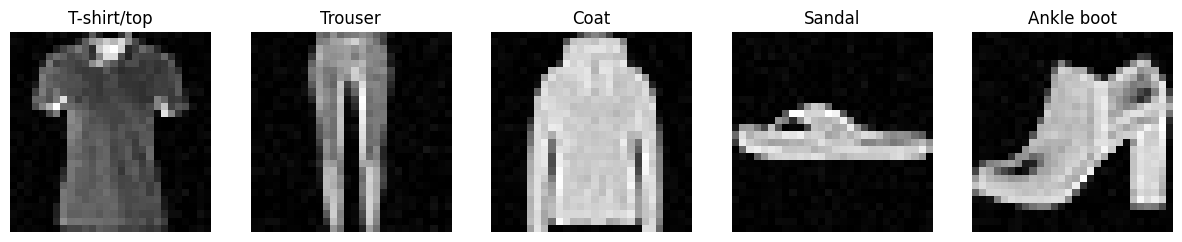

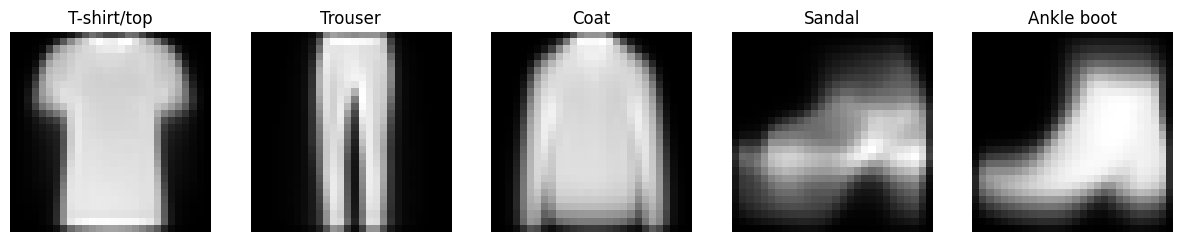

Train Accuracy: 0.844
Train Confusion Matrix:
[[3989   18  717   53   16]
 [ 105 3843  768   81   33]
 [  48   22 4681   54   19]
 [  75   20  736 3925   16]
 [ 110   27  738   88 3818]]


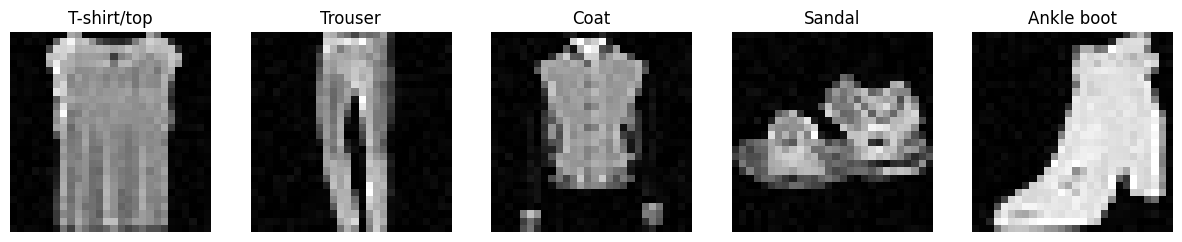

Test Accuracy: 0.18966666666666668
Test Confusion Matrix:
[[159 270 372 177 229]
 [199 239 352 166 214]
 [182 259 329 181 225]
 [204 265 353 193 213]
 [192 264 365 180 218]]


In [4]:
import pickle  # to load the dataset from .pkl file
import numpy as np  # for array manipulations and mathematical operations
import matplotlib.pyplot as plt  # to visualize images and plot confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix  # to evaluate the model's performance

# Q 1a: load the training data and prepare it
train_file_path = 'TrainData.pkl'
try:
    with open(train_file_path, 'rb') as file:
        train_data = pickle.load(file)  # Load training data from pkl file
except FileNotFoundError:
    print(f"error : File {train_file_path} was not found.")
    exit(1)

# extract training images and labels using the correct keys
train_images = train_data['X'].astype(np.float64)  # convert images for better precision in calculations
train_labels = train_data['Y']

# Q 1b: visualize one example of each label
num_samples = train_images.shape[2]
train_images_reshaped = train_images.reshape(num_samples, -1)  # flatten image into a vector

# assign label names based on the provided label mapping
label_names = ["T-shirt/top", "Trouser", "Coat", "Sandal", "Ankle boot"]

# visualize one example of each label in the training set
fig, axes = plt.subplots(1, len(label_names), figsize=(15, 15))
for i, label in enumerate(label_names):
    index = np.where(train_labels == i)[0][0]  # find first occurrence of each label
    axes[i].imshow(train_images[:, :, index], cmap='gray')  # show the image in grayscale
    axes[i].set_title(f"{label}")  # title with the label name
    axes[i].axis('off')  # hide axis
plt.show()

# Q 1c: flatten images to 2D array for entire dataset
train_images_flattened = train_images_reshaped  # this already done in the previous reshaping step

# Q 2a: implement gaussian anive baya parameter estimation
def compute_gnb_parameters(X, y):
    # get unique classes from dataset
    classes = np.unique(y)
    
    # count number of unique classes and features
    n_classes = len(classes)
    n_features = X.shape[1]

    # initialize arrays to store priors, means, and covariances for each class
    priors = np.zeros(n_classes)
    means = np.zeros((n_classes, n_features))
    covariances = np.zeros((n_classes, n_features, n_features))

    for i, c in enumerate(classes):
        # select all samples bellonging to class c
        X_c = X[y == c]
        
        # calculate probability of class c
        priors[i] = X_c.shape[0] / X.shape[0]
        
        # compute mean of features for class c
        means[i, :] = np.mean(X_c, axis=0)
        
        # center data by subtracting the mean
        centered_X_c = X_c - means[i, :]
        
        # compute the covariance matrix for class c
        covariances[i, :, :] = (centered_X_c.T @ centered_X_c) / X_c.shape[0]

    return priors, means, covariances


# compute parameters using training data
priors, means, covariances = compute_gnb_parameters(train_images_flattened, train_labels)

# Q 2b: implement classification function for GNB
def classify_gnb(X, priors, means, covariances):
    # data is format for precise calculations
    X = X.astype(np.float64)
    
    n_classes = len(priors)
    
    n_samples = X.shape[0]
    
    # store the likelihoods for each class
    log_likelihoods = np.zeros((n_samples, n_classes))

    for i in range(n_classes):
        # get  mean, covariance, prior for class i
        mean = means[i]
        covariance = covariances[i]
        prior = priors[i]
        
        # compute probability of class i
        log_prior = np.log(prior)
        
        # compute determinant of the covariance matrix
        log_det_cov = -0.5 * np.linalg.slogdet(covariance)[1]
        
        inv_cov = np.linalg.inv(covariance)
        
        # subtract mean from sample to center data
        diff = X - mean
        
        # compute likelihood for class i
        log_likelihood = log_prior + log_det_cov - 0.5 * np.sum(np.dot(diff, inv_cov) * diff, axis=1)
        
        # store likelihood class i
        log_likelihoods[:, i] = log_likelihood

    return np.argmax(log_likelihoods, axis=1)


# classify training data using computed parameters
train_predictions = classify_gnb(train_images_flattened, priors, means, covariances)

# Compute parameters using the training data
priors, means, covariances = compute_gnb_parameters(train_images_flattened, train_labels)

# Q 2c: visualize the mean image for each class
fig, axes = plt.subplots(1, len(label_names), figsize=(15, 15))

# calculate and visualize mean image for each class
for i, label in enumerate(label_names):
    class_images = train_images[:, :, train_labels == i]  # extract images for current class
    mean_image = np.mean(class_images, axis=2)  # compute mean across all images for class
    axes[i].imshow(mean_image, cmap='gray')  # display the mean image
    axes[i].set_title(f"{label}")  # correct label name
    axes[i].axis('off')  # hide the axes

plt.show()


# Q 3a: compute the accuracy for the training set
train_accuracy = accuracy_score(train_labels, train_predictions)
print(f"Train Accuracy: {train_accuracy}")

# Q 3b: compute confusion matrix for training set
train_conf_matrix = confusion_matrix(train_labels, train_predictions)
print("Train Confusion Matrix:")
print(train_conf_matrix)

# Q 4: repeat steps for the test set
test_file_path = 'TestData.pkl'
try:
    with open(test_file_path, 'rb') as file:
        test_data = pickle.load(file)
except FileNotFoundError:
    print(f"error : File {test_file_path}  was not found.")
    exit(1)

# extract test images and labels using correct keys
test_images = test_data['X'].astype(np.float64)  # convert images
test_labels = test_data['Y']

# flatten images to vectors
num_test_samples = test_images.shape[2]
test_images_flattened = test_images.reshape(num_test_samples, -1)

# visualize example of each label in test set
fig, axes = plt.subplots(1, len(label_names), figsize=(15, 15))
for i, label in enumerate(label_names):
    index = np.where(test_labels == i)[0][0]  # find first occurrence of each label
    axes[i].imshow(test_images[:, :, index], cmap='gray')  # show the image in grayscale
    axes[i].set_title(f"{label}")  # title with label name
    axes[i].axis('off')  # hide axis
plt.show()

# classify test data using parameters computed from training data
test_predictions = classify_gnb(test_images_flattened, priors, means, covariances)

# compute accuracy for the test set
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

# compute confusion matrix for test set
test_conf_matrix = confusion_matrix(test_labels, test_predictions)
print("Test Confusion Matrix:")
print(test_conf_matrix)
